<a href="https://colab.research.google.com/github/dsfernandez/DoE-RENEW/blob/main/renew_act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing act-atmos
Following README.rst in https://github.com/ARM-DOE/ACT:

ACT can be installed a few different ways. One way is to install using pip. When installing with pip, the ACT dependencies found in requirements.txt will also be installed. To install using pip:

In [ ]:
!pip install act-atmos

# Create a dataset to mimic ARM file formats

Example shows how to create a dataset from an ARM DOD. This will enable users to create files that mimic ARM files, making for easier use across the community.

In [ ]:
import act

# Create an empty dataset using an ARM DOD
ds = act.io.armfiles.create_ds_from_arm_dod('vdis.b1', {'time': 1440}, scalar_fill_dim='time')

# Print out the xarray dataset to see that it's empty
print(ds)

# The user could populate this through a number of ways
# and that's best left up to the user on how to do it.
# If one has an existing dataset, a mapping of variable
# names is sometimes the easiest way

# Let's look at some variable attributes
# These can be updated and it would be up to the
# user to ensure these tests are being applied
# and are appropriately set in the cooresponding QC variable
print(ds['num_drops'].attrs)

# Next, let's print out the global attribuets
print(ds.attrs)

# Add additional attributes or append to existing
# if they are needed using a dictionary
atts = {
    'command_line': 'python  plot_create_arm_ds.py',
    'process_version': '1.2.3',
    'history': 'Processed with Jupyter Workbench',
    'random': '1234253sdgfadf'
}
for a in atts:
    if a in ds.attrs:
        ds.attrs[a] += atts[a]
    else:
        ds.attrs[a] = atts[a]
    # Print out the attribute
    print(a, ds.attrs[a])

# Write data out to netcdf
ds.to_netcdf('./sgpvdisX1.b1.20230101.000000.nc')

# If one wants to clean up the dataset to better match CF standards
# the following can be done as well
ds.write.write_netcdf(cf_compliant=True, path='./sgpvdisX1.b1.20230101.000000.cf')

# Query and plot ASOS data

This example shows how to plot timeseries of ASOS data from Chicago O’Hare airport.

Downloading: ORD


/usr/local/lib/python3.9/dist-packages/act/plotting/plot.py:81: UserWarning: Could not discern datastreamname and dict or tuple were not provided. Using defaultname of act_datastream!
  warnings.warn(


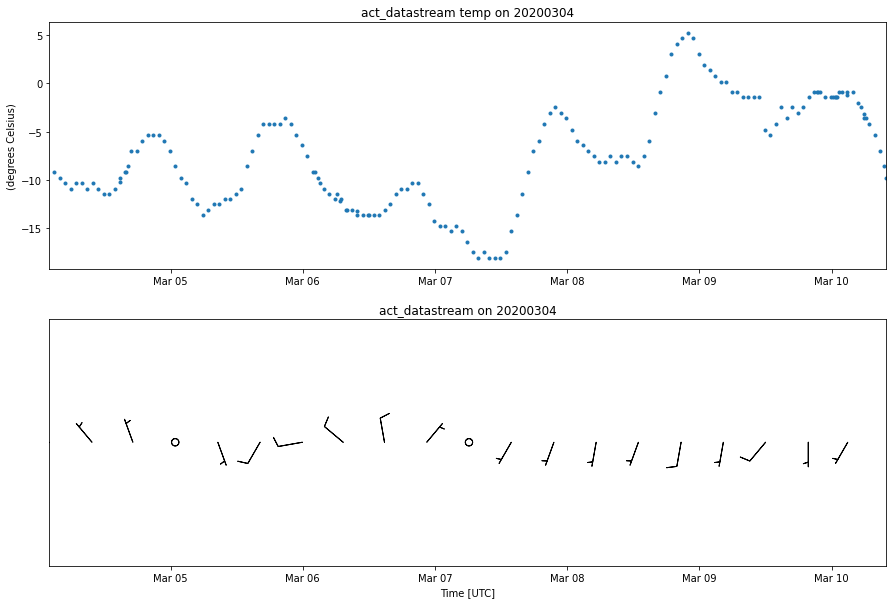

In [17]:
from datetime import datetime

import matplotlib.pyplot as plt

import act

time_window = [datetime(2020, 3, 4, 2, 0), datetime(2020, 3, 10, 10, 0)]
station = 'KORD'
my_asoses = act.discovery.get_asos(time_window, station='ORD')

display = act.plotting.TimeSeriesDisplay(my_asoses['ORD'], subplot_shape=(2,), figsize=(15, 10))
display.plot('temp', subplot_index=(0,))
display.plot_barbs_from_u_v(u_field='u', v_field='v', subplot_index=(1,))
display.axes[1].set_ylim([0, 2])
plt.show()